## Predict whether a tumor is malignant or benign (binary classification)

- Use the **Breast Cancer Wisconsin (Diagnostic)** dataset from Kaggle (or UCI)
- Input features are continuous numeric features (radius, texture, perimeter, area, etc.).
- Output is binary: malignant (1) vs benign (0).


In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Normalization,Dense
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from sklearn.metrics import r2_score

In [175]:
df = pd.read_csv("../data/breast_cancer.csv")

In [176]:
 
X_train = df.loc[:,"radius_mean": "fractal_dimension_worst" ]
Y_train = df.loc[:,"diagnosis"  ]
Y_train = Y_train.map({"M" :1,"B": 0 }) 
X_np =X_train.to_numpy().astype("float32")
normalizer = Normalization(axis=-1)
normalizer.adapt(X_np)
X_norm = normalizer(X_np)

In [177]:
X_norm

<tf.Tensor: shape=(569, 30), dtype=float32, numpy=
array([[ 1.0970639 , -2.0733354 ,  1.2699339 , ...,  2.296076  ,
         2.7506218 ,  1.9370147 ],
       [ 1.8298205 , -0.35363266,  1.6859546 , ...,  1.0870844 ,
        -0.24389003,  0.2811899 ],
       [ 1.5798882 ,  0.45618662,  1.5665033 , ...,  1.9550004 ,
         1.1522543 ,  0.20139132],
       ...,
       [ 0.7022844 ,  2.0455735 ,  0.67267597, ...,  0.4140688 ,
        -1.1045494 , -0.31840938],
       [ 1.8383411 ,  2.3364568 ,  1.9825245 , ...,  2.2899852 ,
         1.9190824 ,  2.2196352 ],
       [-1.8084011 ,  1.221792  , -1.8143886 , ..., -1.7450626 ,
        -0.04813889, -0.75120676]], shape=(569, 30), dtype=float32)>

In [178]:
model = Sequential([
    Dense(units=3,activation="sigmoid",name="L1"),
    Dense(units=1,activation="sigmoid",name="L2"),
])


model.compile(loss=BinaryCrossentropy(),optimizer='adam')
model.fit(X_norm,Y_train,epochs=100)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6565  
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6247 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5961 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5707 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5482 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5286 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5108 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4949 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4803 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4666 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4542 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4424 
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4312 
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4206 
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [179]:
predictions = model.predict(X_norm)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predict probabilities
 
# Convert to 0 or 1
y_pred = (predictions > 0.5).astype(int)

# Compute metrics
print("Accuracy:", accuracy_score(Y_train, y_pred))
print("Precision:", precision_score(Y_train, y_pred))
print("Recall:", recall_score(Y_train, y_pred))
print("F1 Score:", f1_score(Y_train, y_pred))  

Accuracy: 0.9859402460456942
Precision: 0.9857142857142858
Recall: 0.9764150943396226
F1 Score: 0.981042654028436


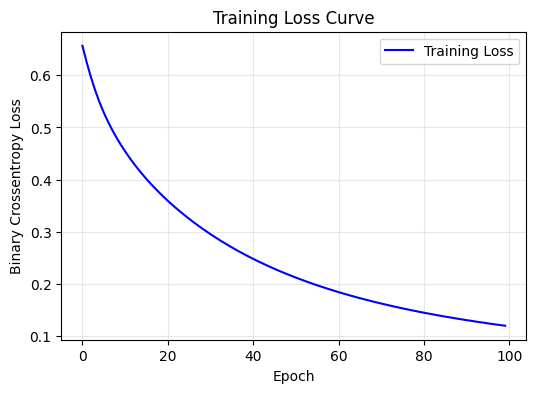

In [181]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# --- Plot training loss curve ---
plt.figure(figsize=(6, 4))
plt.plot(model.history.history['loss'], label='Training Loss', color='blue')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

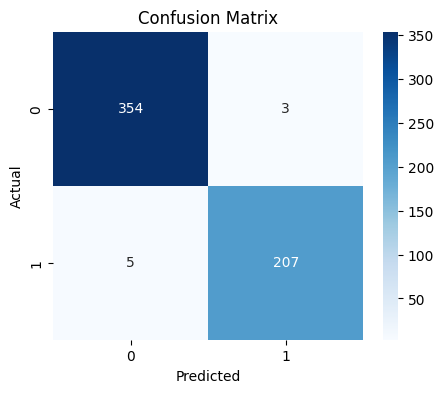

In [182]:
cm = confusion_matrix(Y_train, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show() 